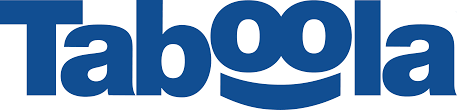

# Taboola CTR Value-For-Money Prediction
---

> Catboost, xgboost basline

> some fully connected network

In [2]:
from collections import Counter
import pandas as pd
import logging

## Data

In [39]:
sample = pd.read_csv('part-00002.csv')

In [40]:
sample.head()

,page_view_start_time,user_id_hash,target_id_hash,syndicator_id_hash,campaign_id_hash,empiric_calibrated_recs,empiric_clicks,target_item_taxonomy,placement_id_hash,user_recs,...,source_id_hash,source_item_type,browser_platform,os_family,country_code,region,day_of_week,time_of_day,gmt_offset,is_click
0,1586972175040,cc720429312f18d7b2e4c113c6f48cef3d16836b7fdce0...,e47742764f99fbe66f06369af9557667a87acf3d7942a1...,f7fc333375dc274f0c94a23df0b3768404f87195742a6e...,8681b856166e1e7f002f6a2607a4e2ba35ec4d9ce9812e...,129.53584,930.0,LIFE~TRAVEL,251974fe3b996b3c952690db23c62aa3698a99e46ee022...,1051.0,...,acefa4deefb13b8d19cbe262528f5c3532bc7f0363e4c3...,text,DESK,6,US,NH,3,13,-400,1.0
1,1586553332086,d8bc219c47b2570fea85d82b9df00973487e8ab1ca76e1...,cfbc031f0bacfa09f2a70a02c1024711d2e7ef205e9339...,888081c07a6adc27ad51bde46544a5fe2f803e8293e561...,7b4c9ccff73b03f8d6c41d8b2dd4d190f387081b7e5b2c...,357.14075,1286.0,LIFE~PETS,970f1987570a4ece129c056ddf4de53b1f43b0882ea65c...,1074.0,...,4c7987d659b97d2007c45bb3c9fd903b135a2ef18130f7...,homepage,DESK,6,US,NV,5,14,-700,0.0
2,1586231495787,ed8ddb92498f13f88101c13e0a26fdcc87db5d929c17d2...,c775af6de0b254897ec4d00d174e298a6d34dd6e2c104b...,100328dbbf569e6848665b2cd40823e7dde2175050d987...,6801569fe0d16817528745e61b4897202634ea9905a5f2...,298.30496,139.0,LIFE~HOME,3ce0dc6ef6be59d27da0a3ecbd2b5b28c88bf5e3a98bc9...,320.0,...,09bb81e4503b782e80b2c802ad08576f39f76cc4c466dd...,text,DESK,6,US,NY,1,23,-400,0.0
3,1586720067383,f2b6bcf14717b7148cb8f92cbcbecb3a9ff24607b0a5c9...,b62da02a3fc769b747ec9de5bc90d988646ef35ad39873...,778263b6cc984e65c497d16b7fec917c3230cbdcc56fa1...,e7b35c85695999bbcbfc4d10b932c5e8b6b52d5720237e...,50006.86300,64460.0,TECH,39d46cdd8f08693dd0cb967d016efec97d0bc5eb1899dc...,206.0,...,c83159630182a5b7bc3c3fc985156c03b2a43129d63376...,homepage,DESK,6,US,AR,0,14,-500,1.0
4,1586820341555,6ea6706128c562661fd6ec45ea2521a9f2837c8c9d5078...,a07a13aa1a83706186e4bf205ba79c614697284a059e08...,a517d24ada92fc973f1612bd27ce716ff506485868d441...,b8abf8828615be8732cbe1589fa2c8f4fd8cecb5bca791...,15547.64200,7094.0,LIFE~HEALTH,f46a38c5c8d89917121df61f7a725748354c47dfc79cfe...,0.0,...,c83159630182a5b7bc3c3fc985156c03b2a43129d63376...,homepage,DESK,6,US,GA,1,19,-400,0.0


### Features
* user statistics instead of user id
* target statistics instead of target
* syndicator statistics instead of syndicator
* campaign statistics instead of campaign_id_hash
* empiric_calibrated_recs?
* empiric_clicks?
* target_item_taxonomy - ohe
..


### Steps
* Catboost
* Fully connected network

# EDA

In [41]:
sample.columns

Index(['page_view_start_time', 'user_id_hash', 'target_id_hash',
       'syndicator_id_hash', 'campaign_id_hash', 'empiric_calibrated_recs',
       'empiric_clicks', 'target_item_taxonomy', 'placement_id_hash',
       'user_recs', 'user_clicks', 'user_target_recs', 'publisher_id_hash',
       'source_id_hash', 'source_item_type', 'browser_platform', 'os_family',
       'country_code', 'region', 'day_of_week', 'time_of_day', 'gmt_offset',
       'is_click'],
      dtype='object')

how do we use `page_view_start_time`?

In [42]:
p = sample.user_id_hash.nunique() / sample.user_id_hash.count()
print(f"We have {format(p*100, '.2f')+ '%'} unique user touch points")

We have 97.46% unique user touch points


We have 97% unique user ids, so no room for user statistics, better to drop it. 

In [43]:
p = sample.target_id_hash.nunique() / sample.target_id_hash.count()
print(f"We have {format(p*100, '.2f')+'%'} unique target id touch points \n")
      
print(f'We have only {sample.target_id_hash.nunique()} target ids in the sample')
print(f'We have {sample.target_id_hash.count()} target id instances')

We have 6.44% unique target id touch points 

We have only 27072 target ids in the sample
We have 420217 target id instances


We can do OHE or hashing.. also take statistics as features

In [44]:
p = sample.syndicator_id_hash.nunique() / sample.syndicator_id_hash.count()
print(f"We have {format(p*100, '.4f')+'%'} unique target id touch points \n")
      
print(f'We have only {sample.syndicator_id_hash.nunique()} syndicator_id_hash in the sample')
print(f'We have {sample.syndicator_id_hash.count()} syndicator_id_hash instances')

We have 0.4541% unique target id touch points 

We have only 1908 syndicator_id_hash in the sample
We have 420217 syndicator_id_hash instances


No problem for OHE, and statistics

In [45]:
p = sample.campaign_id_hash.nunique() / sample.campaign_id_hash.count()
print(f"We have {format(p*100, '.2f')+'%'} unique campaign_id_hash \n")
      
print(f'We have only {sample.campaign_id_hash.nunique()} campaign_id_hash in the sample')
print(f'We have {sample.campaign_id_hash.count()} campaign_id_hash instances')

We have 2.94% unique campaign_id_hash 

We have only 12365 campaign_id_hash in the sample
We have 420217 campaign_id_hash instances


No problem for OHE, and statistics

In [46]:
sample.empiric_calibrated_recs

0            129.53584
1            357.14075
2            298.30496
3          50006.86300
4          15547.64200
              ...     
420212     31403.35000
420213     19827.29000
420214      1413.67980
420215    331307.00000
420216      4335.91160
Name: empiric_calibrated_recs, Length: 420217, dtype: float64

We can normalize, or leave as is

In [47]:
sample.empiric_clicks

0           930.0
1          1286.0
2           139.0
3         64460.0
4          7094.0
           ...   
420212    47089.0
420213    13066.0
420214    11275.0
420215    53826.0
420216     2679.0
Name: empiric_clicks, Length: 420217, dtype: float64

We can normalize, or leave as is

In [48]:
sample.target_item_taxonomy.unique()

array(['LIFE~TRAVEL', 'LIFE~PETS', 'LIFE~HOME', 'TECH', 'LIFE~HEALTH',
       'ENTERTAINMENT~MUSIC', 'BUSINESS~FINANCE', 'LIFE', 'UNKNOWN',
       'LIFE~FASHION', 'ENTERTAINMENT', 'SPORTS~FOOTBALL', 'BUSINESS',
       'AUTOS', 'LIFE~ANIMALS', 'LIFE~SOCIETY', 'SPORTS~BASKETBALL',
       'LIFE~RELIGION~CHRISTIANITY', 'BUSINESS~CAREERS', 'SPORTS',
       'LIFE~FOOD', 'SPORTS~FIGHTING', 'NEWS~ARMED-CONFLICT',
       'ENTERTAINMENT~CELEBS', 'LIFE~EDUCATION', 'LIFE~FAMILY',
       'LIFE~HEALTH-AND-FITNESS', 'BUSINESS~SHOPPING',
       'BUSINESS~INVESTING', 'NEWS', 'NEWS~MIDDLE-EAST', 'TECH~SCIENCE',
       'NEWS~FOREIGN-AFFAIRS', 'TECH~MOBILE', 'BUSINESS~REAL-ESTATE',
       'NEWS~POLITICS', 'NEWS~WORLD', 'TECH~ELECTRONICS', 'LIFE~BEAUTY',
       'ENTERTAINMENT~COMEDY', 'LIFE~RELIGION', 'OPINIONS',
       'ENTERTAINMENT~TV', 'TECH~GAMING', 'INDIA~POLITICS', 'ENVIRONMENT',
       'LIFE~WOMEN', 'NEWS~LAW-ENFORCEMENT', 'LIFE~ART',
       'LIFE~HOBBIES-AND-INTERESTS', 'LIFE~SEX', 'LIFE~NATURE',


OHE

In [49]:
p = sample.placement_id_hash.nunique() / sample.placement_id_hash.count()
print(f"We have {format(p*100, '.2f')+'%'} unique placement ids touch points \n")
      
print(f'We have only {sample.placement_id_hash.nunique()}  placement ids in the sample')
print(f'We have {sample.placement_id_hash.count()}  placement ids instances')

We have 0.25% unique placement ids touch points 

We have only 1047  placement ids in the sample
We have 420217  placement ids instances


OHE and statistics

In [50]:
sample.user_recs

0         1051.0
1         1074.0
2          320.0
3          206.0
4            0.0
           ...  
420212       0.0
420213     496.0
420214     323.0
420215       3.0
420216     332.0
Name: user_recs, Length: 420217, dtype: float64

We can normalize, or leave as is

In [51]:
sample.user_clicks

0         205.0
1          69.0
2           0.0
3           7.0
4           0.0
          ...  
420212      0.0
420213      0.0
420214      6.0
420215      0.0
420216     32.0
Name: user_clicks, Length: 420217, dtype: float64

We can normalize, or leave as is

In [52]:
sample.columns

Index(['page_view_start_time', 'user_id_hash', 'target_id_hash',
       'syndicator_id_hash', 'campaign_id_hash', 'empiric_calibrated_recs',
       'empiric_clicks', 'target_item_taxonomy', 'placement_id_hash',
       'user_recs', 'user_clicks', 'user_target_recs', 'publisher_id_hash',
       'source_id_hash', 'source_item_type', 'browser_platform', 'os_family',
       'country_code', 'region', 'day_of_week', 'time_of_day', 'gmt_offset',
       'is_click'],
      dtype='object')

In [53]:
sample.user_target_recs.value_counts()

0.0     326414
1.0      44025
2.0      18353
3.0       9243
4.0       5688
         ...  
92.0         1
99.0         1
79.0         1
81.0         1
73.0         1
Name: user_target_recs, Length: 97, dtype: int64

Ordinal features, keep or normalize

In [54]:
p = sample.publisher_id_hash.nunique() / sample.publisher_id_hash.count()
print(f"We have {format(p*100, '.2f')+'%'} unique publisher_id_hash touch points \n")
      
print(f'We have only {sample.publisher_id_hash.nunique()}  publisher_id_hash in the sample')
print(f'We have {sample.publisher_id_hash.count()}  publisher_id_hash instances')

We have 0.00% unique publisher_id_hash touch points 

We have only 3  publisher_id_hash in the sample
We have 420217  publisher_id_hash instances


OHE and statistics (share of touch points per publisher) 

In [55]:
p = sample.source_id_hash.nunique() / sample.source_id_hash.count()
print(f"We have {format(p*100, '.2f')+'%'} unique source_id_hash touch points \n")
      
print(f'We have only {sample.source_id_hash.nunique()}  placement ids in the sample')
print(f'We have {sample.source_id_hash.count()}  placement ids instances')

We have 7.93% unique source_id_hash touch points 

We have only 33344  placement ids in the sample
We have 420217  placement ids instances


Good for OHE and statistics 

In [56]:
sample.source_item_type.unique()

array(['text', 'homepage', 'photo', 'video', 'category'], dtype=object)

OHE and statistics

In [57]:
sample.browser_platform.unique()

array(['DESK', 'PHON', 'TBLT', 'TV'], dtype=object)

OHE and statistics 

In [58]:
sample.os_family.unique()

array([6, 2, 3, 5, 1, 4, 0], dtype=int64)

OHE its not ordinal

In [59]:
sample.country_code.unique()

array(['US', 'NG', 'IN', 'RU', 'PR', 'RO', 'AU', 'IR', 'DE', 'AT', 'PL',
       'NL', 'HK', 'LB', 'BE', 'TT', 'KR', 'PH', 'SG', 'LK', 'FR', 'JO',
       'HU', 'MX', 'IT', 'BS', 'RS', 'QA', 'TR', 'GB', 'CA', 'KH', 'TC',
       'TH', 'IE', 'MP', 'EG', 'SX', 'DM', 'VI', 'SE', 'GH', 'KE', 'ID',
       'PT', 'CN', 'CY', 'EC', 'LT', 'CZ', 'DO', 'BB', 'PK', nan, 'PS',
       'VN', 'JP', 'MN', 'GU', 'SD', 'SR', 'FI', 'AI', 'AO', 'CO', 'PA',
       'JM', 'Y', 'IL', 'GE', 'AG', 'NO', 'CL', 'HR', 'SA', 'AL', 'LU',
       'CH', 'IS', 'BG', 'SK', 'VC', 'ES', 'GR', 'MO', 'PE', 'TZ', 'BQ',
       'AW', 'DK', 'TJ', 'NR', 'SL', 'NZ', 'AE', 'FJ', 'MH', 'AR', 'MU',
       'BH', 'BM', 'MT', 'BR', 'TW', 'EE', 'ZA', '99', 'MK', 'NP', 'UZ',
       'SI', 'SV', 'SB', 'BZ', 'CR', 'UA', 'BD', 'BA', 'MZ', 'BN', 'CW',
       'LC', 'GI', 'KY', 'UY', 'MY', 'LV', 'KW', 'RW', 'LA', 'MQ', 'BW',
       'MA', 'DZ', 'LY', 'IQ', 'ZM', 'HT', 'PY', 'HN', 'GY', 'CU', 'ZW',
       'DJ', 'MW', 'CM', 'AS', 'LR', 'CV', 'MR', 'ER'

Replace values that are not in the 52 states with 'other'

In [60]:
sample.country_code.unique()

array(['US', 'NG', 'IN', 'RU', 'PR', 'RO', 'AU', 'IR', 'DE', 'AT', 'PL',
       'NL', 'HK', 'LB', 'BE', 'TT', 'KR', 'PH', 'SG', 'LK', 'FR', 'JO',
       'HU', 'MX', 'IT', 'BS', 'RS', 'QA', 'TR', 'GB', 'CA', 'KH', 'TC',
       'TH', 'IE', 'MP', 'EG', 'SX', 'DM', 'VI', 'SE', 'GH', 'KE', 'ID',
       'PT', 'CN', 'CY', 'EC', 'LT', 'CZ', 'DO', 'BB', 'PK', nan, 'PS',
       'VN', 'JP', 'MN', 'GU', 'SD', 'SR', 'FI', 'AI', 'AO', 'CO', 'PA',
       'JM', 'Y', 'IL', 'GE', 'AG', 'NO', 'CL', 'HR', 'SA', 'AL', 'LU',
       'CH', 'IS', 'BG', 'SK', 'VC', 'ES', 'GR', 'MO', 'PE', 'TZ', 'BQ',
       'AW', 'DK', 'TJ', 'NR', 'SL', 'NZ', 'AE', 'FJ', 'MH', 'AR', 'MU',
       'BH', 'BM', 'MT', 'BR', 'TW', 'EE', 'ZA', '99', 'MK', 'NP', 'UZ',
       'SI', 'SV', 'SB', 'BZ', 'CR', 'UA', 'BD', 'BA', 'MZ', 'BN', 'CW',
       'LC', 'GI', 'KY', 'UY', 'MY', 'LV', 'KW', 'RW', 'LA', 'MQ', 'BW',
       'MA', 'DZ', 'LY', 'IQ', 'ZM', 'HT', 'PY', 'HN', 'GY', 'CU', 'ZW',
       'DJ', 'MW', 'CM', 'AS', 'LR', 'CV', 'MR', 'ER'

OHE + statistics + some other features you want regarding the state

In [61]:
from collections import Counter
country_region = zip(sample.country_code, sample.region)
counts = Counter(country_region)

In [62]:
sample.region.nunique()

853

In [63]:
sample.region.unique()[:5]

array(['NH', 'NV', 'NY', 'AR', 'GA'], dtype=object)

In [65]:
country_region = list(zip(sample.country_code, sample.region))
country_region_set = set(country_region)
num_us_countries = sum(1 for s in country_region_set if s[0] == "US")
us_instances = sum(1 for s in country_region if s[0] == "US")
print(f"number of US countries: {num_us_countries} with {us_instances} instances")
print(f"number of other countries: {len(country_region_set) - num_us_countries} with {len(country_region) - us_instances} instances")
c = Counter(country_region)
c.most_common(60)

number of US countries: 52 with 407497 instances
number of other countries: 1617 with 12720 instances


[(('US', 'CA'), 37602),
 (('US', 'FL'), 29683),
 (('US', 'TX'), 28804),
 (('US', 'NY'), 19906),
 (('US', 'PA'), 18340),
 (('US', 'OH'), 16348),
 (('US', 'IL'), 16126),
 (('US', 'WA'), 13353),
 (('US', 'MI'), 12832),
 (('US', 'NC'), 12183),
 (('US', 'VA'), 11835),
 (('US', 'GA'), 11736),
 (('US', 'AZ'), 11645),
 (('US', 'NJ'), 11328),
 (('US', 'CO'), 9341),
 (('US', 'MA'), 9106),
 (('US', 'WI'), 8959),
 (('US', 'MN'), 8792),
 (('US', 'MD'), 8369),
 (('US', 'IN'), 8110),
 (('US', 'TN'), 7862),
 (('US', 'MO'), 7726),
 (('US', 'SC'), 5994),
 (('US', 'OR'), 5916),
 (('US', 'KY'), 5346),
 (('US', 'AL'), 5248),
 (('US', 'IA'), 4981),
 (('US', 'CT'), 4511),
 (('US', 'NV'), 4389),
 (('US', 'LA'), 4314),
 (('US', 'OK'), 4273),
 (('US', 'KS'), 4201),
 (('US', 'UT'), 3516),
 (('US', 'AR'), 3054),
 (('US', 'NE'), 2900),
 (('US', 'NM'), 2749),
 (('US', 'NH'), 2736),
 (('US', 'ID'), 2593),
 (('US', 'MS'), 2519),
 (('US', 'WV'), 2376),
 (('US', 'MT'), 1989),
 (('US', 'ME'), 1915),
 (('US', 'HI'), 1670

replace numeric values to 'other' and OHE

In [93]:
sample.day_of_week

0         3
1         5
2         1
3         0
4         1
         ..
420212    3
420213    1
420214    0
420215    1
420216    4
Name: day_of_week, Length: 420217, dtype: int64

Its ordinal, so normelize or not 

In [95]:
sample.time_of_day

0         13
1         14
2         23
3         14
4         19
          ..
420212     6
420213    22
420214     7
420215    22
420216    19
Name: time_of_day, Length: 420217, dtype: int64

Its ordinal so no problem

In [97]:
sample.gmt_offset

0        -400
1        -700
2        -400
3        -500
4        -400
         ... 
420212   -400
420213   -400
420214   -400
420215   -400
420216   -400
Name: gmt_offset, Length: 420217, dtype: int64

maybe we can use it to calculate if its morning or evening for the user 

In [79]:
counts = Counter(sample.is_click)
total = sum(counts.values())
for label, count in counts.most_common():
    print(f"{label}\t{count}\t{100 * count / total:.2f}%")

0.0	210333	50.05%
1.0	209884	49.95%


it the binary label

In [67]:
import geopy

nom = geopy.Nominatim()

c:\users\ronp\py37-dasci\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
nom.geocode("US CA")

Location(California, United States of America, (36.7014631, -118.7559974, 0.0))